In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import json
import torch
from glob import glob
import joblib
import seaborn as sns

In [2]:
files = sorted(glob('weight_training/*'), key = lambda x:(int(x.split('_')[2][1:]), int(x.split('_')[3][5:])))

In [3]:
files

['weight_training/biosyn_n100_times1_sparse_weight.bin',
 'weight_training/biosyn_n100_times2_sparse_weight.bin',
 'weight_training/biosyn_n100_times3_sparse_weight.bin',
 'weight_training/biosyn_n100_times4_sparse_weight.bin',
 'weight_training/biosyn_n100_times5_sparse_weight.bin',
 'weight_training/biosyn_n100_times6_sparse_weight.bin',
 'weight_training/biosyn_n100_times7_sparse_weight.bin',
 'weight_training/biosyn_n100_times8_sparse_weight.bin',
 'weight_training/biosyn_n100_times9_sparse_weight.bin',
 'weight_training/biosyn_n100_times10_sparse_weight.bin',
 'weight_training/biosyn_n500_times1_sparse_weight.bin',
 'weight_training/biosyn_n500_times2_sparse_weight.bin',
 'weight_training/biosyn_n500_times3_sparse_weight.bin',
 'weight_training/biosyn_n500_times4_sparse_weight.bin',
 'weight_training/biosyn_n500_times5_sparse_weight.bin',
 'weight_training/biosyn_n500_times6_sparse_weight.bin',
 'weight_training/biosyn_n500_times7_sparse_weight.bin',
 'weight_training/biosyn_n500_

In [4]:
dense_weight = []
sparse_weight = []
for file in files:
    with open(file,'rb') as f:
        weights = joblib.load(f)
        dense_weight.append(weights[0].detach().numpy())
        sparse_weight.append(weights[1].detach().numpy())

In [5]:
dense_weights = np.concatenate(dense_weight, axis = 0).reshape(-1,10)
sparse_weights = np.concatenate(sparse_weight, axis = 0).reshape(-1,10)

In [6]:
ratio = dense_weights/sparse_weights

In [7]:
ratio

array([[13.293164 , 11.082902 ,  9.714401 , 15.614269 ,  8.324339 ,
        12.900743 , 11.505626 ,  5.1327252, 15.928566 ,  5.788447 ],
       [15.025168 , 23.307962 , 10.543545 , 13.133268 , 13.197463 ,
        10.104706 , 11.426196 , 10.124327 , 18.574203 , 12.909267 ],
       [13.740426 , 12.394038 , 12.080829 , 11.098548 , 10.575016 ,
        24.455915 , 13.159189 , 13.332845 , 12.270542 , 11.416574 ],
       [10.434193 , 12.839762 , 11.871126 , 13.627063 , 12.355004 ,
        11.849125 , 11.198731 , 12.671466 , 15.80425  , 11.021307 ],
       [15.045023 , 13.15717  , 11.716404 , 11.509632 , 11.48448  ,
        10.631667 , 11.9564085, 12.290367 , 11.934143 , 11.144731 ],
       [11.181306 , 11.777225 , 11.752495 , 12.344324 , 12.924376 ,
        12.764983 , 11.089009 , 12.159709 , 11.695859 , 12.416675 ],
       [12.171627 , 12.414351 , 12.985232 , 11.877424 , 13.287595 ,
        12.136361 , 13.050146 , 12.682564 , 11.049591 , 12.013297 ],
       [12.647749 , 11.837002 , 11.914479

In [8]:
x_data = ['100','500','1000','2500','5000','10000','15000','20000']
y_data = ratio.mean(axis=1)
y_data_err = ratio.std(axis = 1)

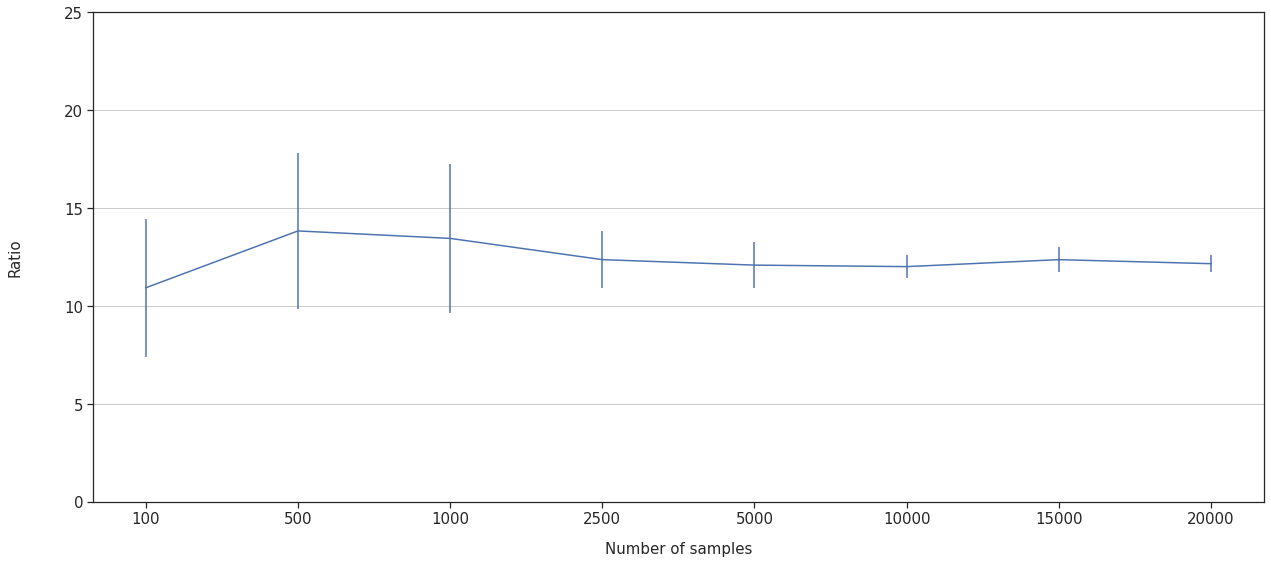

In [13]:
fig, ax = plt.subplots()
sns.set(rc={"figure.figsize": (21, 9)})
sns.set_style("ticks")
ratio_plt = ax.errorbar(x_data, y_data, yerr = y_data_err)
ax.yaxis.grid()
ax.set_ylim(0,25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_ylabel('Ratio',size = 15)
ax.set_xlabel('Number of samples',size = 15)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax.xaxis.set_label_coords(0.5, -0.08)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

In [10]:
import torch

In [11]:
a = torch.tensor([
    [1,2,3],
    [2,3,4],
    [4,5,6]
])

In [12]:
a[torch.randint(3,(2,))]

tensor([[4, 5, 6],
        [1, 2, 3]])